# Emotions from Tweets

Text classification is important in professions like marketing because consumers are sharing their opinions through text more now than they ever have before. As a result, there is a lot of unstructured data that can be tapped into to learn more about the concerns and needs of consumers. The goal of this project is to build a model that can rate the sentiment of a Tweet based on its content.<br><br>

### Table of Contents:

#### Importing Libraries<br>
#### Importing Data<br>
#### Data Exploration<br>
#### Cleaning and Pre-Processing the Data<br>
1.1 Tokenization<br>
1.2 Lemmatization<br>
1.3 Cleaning the Data<br>
#### Data Visualizations<br>
2.1 WordCloud<br>
2.2 Bar Graphs<br>
#### Naive Bayesian Model<br>
3.1 Splitting the Data<br>
3.2 Training the Model<br>
2.2 Testing the Model<br>
2.3 Checking for Accuracy<br>
#### Conclusions

Deep Learning Model - LSTM
5.1. Data Pre-processing
    5.1.1. Word Embeddings
    5.1.2. Global Vectors for Word Representation (GloVe)
    5.1.3. Data Padding
5.2. Data Transformation
5.3. Building the Model
5.4. Training the Model
5.5. Investigating Possibilties to Improve the Model
    5.5.1. Regularization - Dropout
    5.5.2. Inspecting the Data - Unknown Words
5.6. Predicting on Custom Data
5.7. Inspecting Wrongly Predicted Data
Bonus Section
Extra Tip: Pickling !
Further Work

## Import Libraries

In [837]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textblob
import wordcloud
import re

import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree
from sklearn.preprocessing import StandardScaler


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
np.random.seed(0)
from gensim.models import Word2Vec

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

from textblob import TextBlob

import random

## Import Data

In [838]:
df_raw = pd.read_csv('tweets.csv')
df_raw

tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
8716                      Ipad everywhere. #SXSW {link}   
8717  Wave, buzz... RT @mention We interrupt your re...   
8718  Google's Zeiger, a physician never reported po...   
8719  Some Verizon iPhone customers complained their...   
8720  �ϡ�����_��ʋ�΋�ҋ�������⋁_��������_���RT @mentio...   

     emotion_in_tweet_is_directed_at  \
0                             iPhone   
1                 iPad or iPhone App   
2                               iPad   
3                 iPad or iPhone App   
4                             Google   
...                              ...   
8716                            iPad   
8717                             NaN   
8718                             NaN   
8719                             NaN   
8720                             NaN   

     is_there_an_emotion_directed_at_a_brand_or_product  
0                                      Negative emotion  
1                                      Positive emotion  
2                                      Positive emotion  
3                                      Negative emotion  
4                                      Positive emotion  
...                                                 ...  
8716                                   Positive emotion  
8717                 No emotion toward brand or product  
8718                 No emotion toward brand or product  
8719                 No emotion toward brand or product  
8720                 No emotion toward brand or product  

[8721 rows x 3 columns]

## Data Exploration

In [839]:
df_raw.shape

(8721, 3)

In [840]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8720 non-null   object
 1   emotion_in_tweet_is_directed_at                     3169 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8721 non-null   object
dtypes: object(3)
memory usage: 204.5+ KB


In [841]:
df_raw['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               910
Apple                              640
iPad or iPhone App                 451
Google                             412
iPhone                             288
Other Google product or service    282
Android App                         78
Android                             74
Other Apple product or service      34
Name: emotion_in_tweet_is_directed_at, dtype: int64

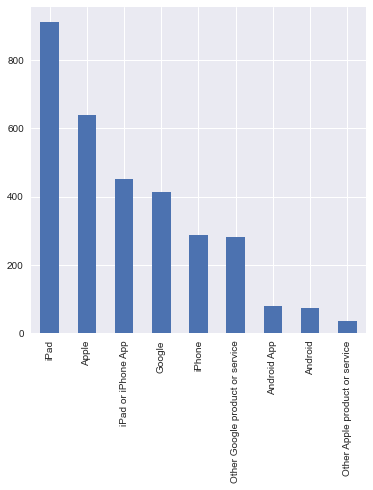

In [842]:
df_raw['emotion_in_tweet_is_directed_at'].value_counts().plot.bar(figsize = (6, 6))

In [843]:
#Printing number of tweets in dataset
print(len(df_raw['tweet_text']))

8721


## Pre-Processing Data

In [844]:
#Simplifying column titles and categories
df = df_raw.rename(columns={'emotion_in_tweet_is_directed_at': 'device', 
                        'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'})
df['emotion'].replace({'No emotion toward brand or product': 'Neutral'}, inplace = True)
df['emotion'].replace({'Negative emotion': 'Negative'}, inplace = True)
df['emotion'].replace({'Positive emotion': 'Positive'}, inplace = True)
df

tweet_text              device  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1     @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2     @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3     @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   
...                                                 ...                 ...   
8716                      Ipad everywhere. #SXSW {link}                iPad   
8717  Wave, buzz... RT @mention We interrupt your re...                 NaN   
8718  Google's Zeiger, a physician never reported po...                 NaN   
8719  Some Verizon iPhone customers complained their...                 NaN   
8720  �ϡ�����_��ʋ�΋�ҋ�������⋁_��������_���RT @mentio...                 NaN   

       emotion  
0     Negative  
1     Positive  
2     Positive  
3     Negative  
4     Positive  
...        ...  
8716  Positive  
8717   Neutral  
8718   Neutral  
8719   Neutral  
8720   Neutral  

[8721 rows x 3 columns]

In [845]:
#Drop rows with NAN
df = df.drop(['device'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  8720 non-null   object
 1   emotion     8721 non-null   object
dtypes: object(2)
memory usage: 136.4+ KB


In [846]:
#Drop rows with NAN
df = df.dropna()

In [847]:
#Making target binary
df['emotion'].replace({'Positive': '1', 'Negative': '0'}, inplace = True)
df.reset_index(drop=True)

tweet_text  emotion
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...        0
1     @jessedee Know about @fludapp ? Awesome iPad/i...        1
2     @swonderlin Can not wait for #iPad 2 also. The...        1
3     @sxsw I hope this year's festival isn't as cra...        0
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...        1
...                                                 ...      ...
8715                      Ipad everywhere. #SXSW {link}        1
8716  Wave, buzz... RT @mention We interrupt your re...  Neutral
8717  Google's Zeiger, a physician never reported po...  Neutral
8718  Some Verizon iPhone customers complained their...  Neutral
8719  �ϡ�����_��ʋ�΋�ҋ�������⋁_��������_���RT @mentio...  Neutral

[8720 rows x 2 columns]

In [848]:
#Dropping "I can't tell" in emotion column
undefined = df.loc[df['emotion'].str.contains("I can't tell")].index
df.drop(undefined, axis = 0, inplace = True)

In [849]:
#Copy dataframe with all values
df_copy = df.copy()

In [850]:
#Dropping "Neutral" in emotion column
neutral = df.loc[df['emotion'].str.contains("Neutral")].index
df.drop(neutral, axis = 0, inplace = True)

In [851]:
df['emotion'] = df['emotion'].astype(int)

In [852]:
print(df['emotion'].value_counts())

1    2869
0     545
Name: emotion, dtype: int64


In [853]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3414 entries, 0 to 8716
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  3414 non-null   object
 1   emotion     3414 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


In [854]:
#Removal of punctuations and symbols
df["tweets"] = df['tweet_text'].str.replace('[{}]'.format(string.punctuation), '')
df = df.drop('tweet_text', 1)
df["tweets"] = df["tweets"].str.lower()
df.head(30)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3414 entries, 0 to 8716
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  3414 non-null   int64 
 1   tweets   3414 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


In [855]:
#Removal of commonly used words with stopwords
stop = stopwords.words('english')
df['tweet_new'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df

emotion                                             tweets  \
0           0  wesley83 i have a 3g iphone after 3 hrs tweeti...   
1           1  jessedee know about fludapp  awesome ipadiphon...   
2           1  swonderlin can not wait for ipad 2 also they s...   
3           0  sxsw i hope this years festival isnt as crashy...   
4           1  sxtxstate great stuff on fri sxsw marissa maye...   
...       ...                                                ...   
8706        1  mention your pr guy just convinced me to switc...   
8708        1  quotpapyrussort of like the ipadquot  nice lol...   
8709        0  diller says google tv quotmight be run over by...   
8713        1  ive always used camera for my iphone bc it has...   
8716        1                          ipad everywhere sxsw link   

                                              tweet_new  
0     wesley83 3g iphone 3 hrs tweeting riseaustin d...  
1     jessedee know fludapp awesome ipadiphone app y...  
2                 swonderlin wait ipad 2 also sale sxsw  
3     sxsw hope years festival isnt crashy years iph...  
4     sxtxstate great stuff fri sxsw marissa mayer g...  
...                                                 ...  
8706  mention pr guy convinced switch back iphone gr...  
8708  quotpapyrussort like ipadquot nice lol sxsw la...  
8709  diller says google tv quotmight run playstatio...  
8713  ive always used camera iphone bc image stabili...  
8716                          ipad everywhere sxsw link  

[3414 rows x 3 columns]

## Data Visualization

We can begin to look at some cloud visualizations in order to understand the frequency of the most used words in the tweets. The larger a word appears on a WordCloud, the more common the word is in the text. The visualizations also create a nice color combination and text font to graphically create a nice and simple first image.

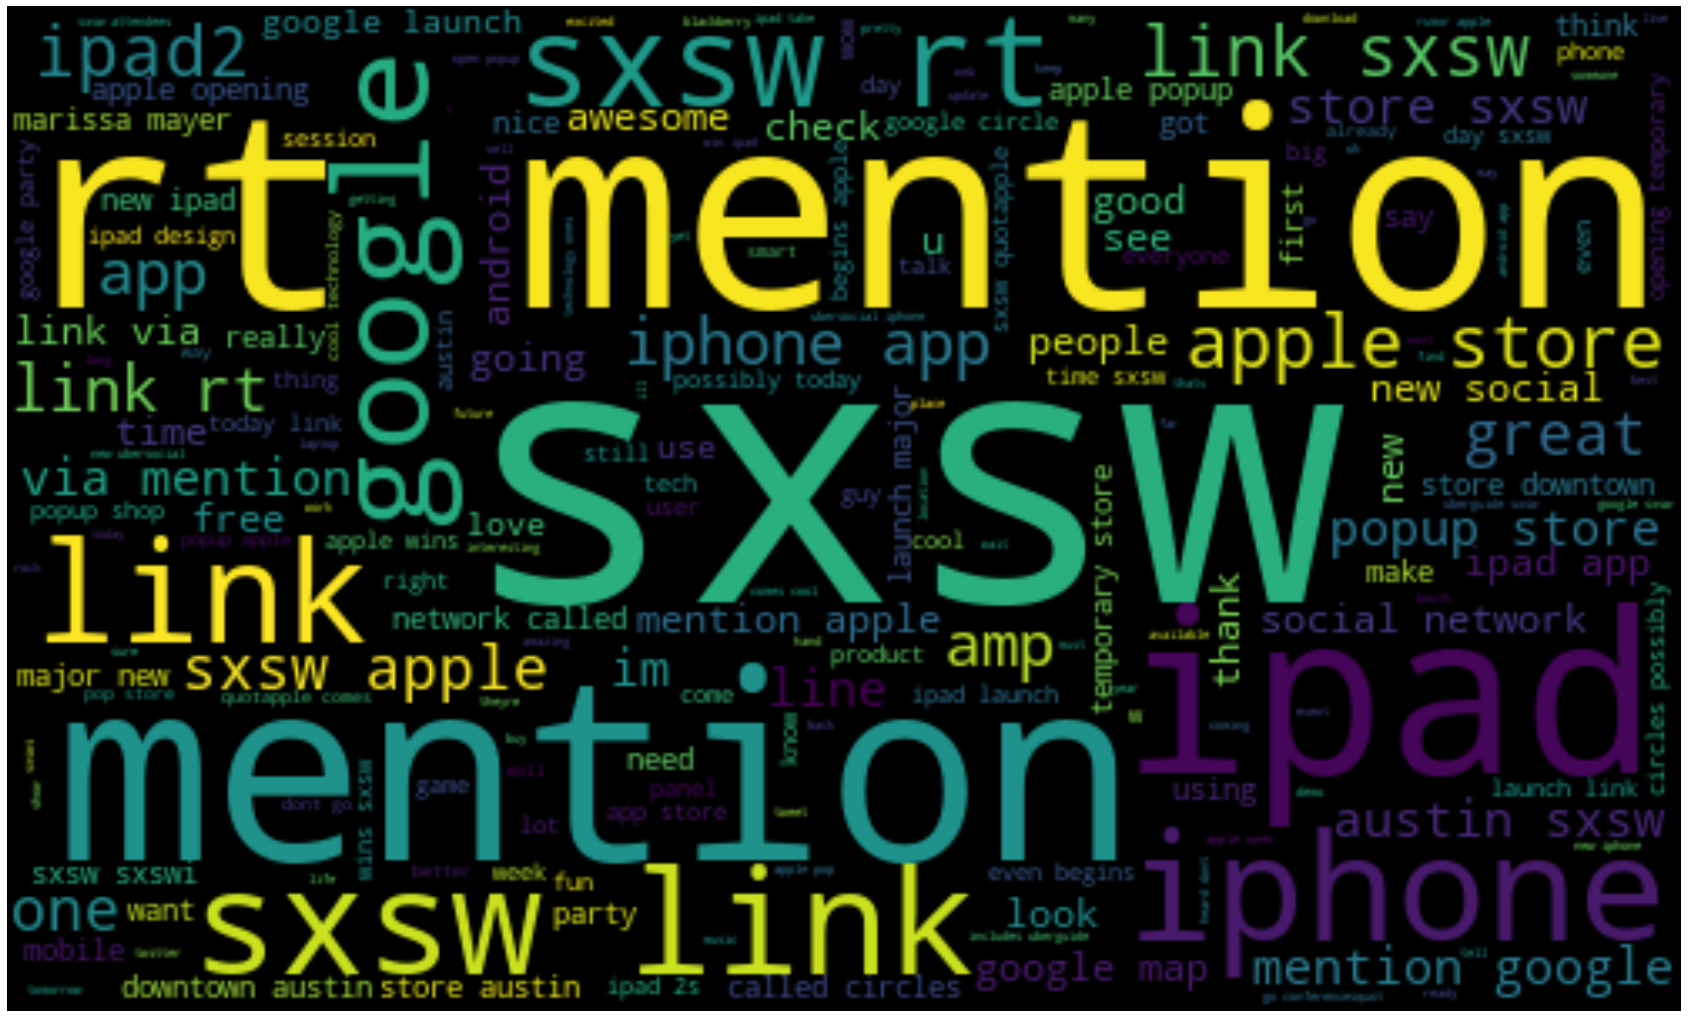

In [856]:
# Word Cloud Visualization
allwords = ' '.join([twts for twts in df['tweet_new']])
wcallwords = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allwords)

fig, ax = plt.subplots(figsize  = (30,30))
plt.imshow(wcallwords, interpolation="bilinear")
plt.axis('off')
plt.show()

A first pass at the wordcloud was actually very useful because we can already see some words that are insignificant but were not cut out using stopwords. These words are specifically insignificant having a little knowledge of how tweets work. For example, "Mention" is used to tag someone in the post and therefore does not add value to the sentiment of the post.

In [857]:
#Removing more non-useful words

unused_words = ['mention', 'link', 'rt', 'via']
df['tweet_new'] = df['tweet_new'].str.replace('|'.join(unused_words), '')

#Removing Numbers
df['tweet_new'] = df['tweet_new'].str.replace('\d+', '')

df['tweet_new']

0       wesley g iphone  hrs tweeting riseaustin dead ...
1       jessedee know fludapp awesome ipadiphone app y...
2                    swonderlin wait ipad  also sale sxsw
3       sxsw hope years festival isnt crashy years iph...
4       sxtxstate great stuff fri sxsw marissa mayer g...
                              ...                        
8706     pr guy convinced switch back iphone great sxs...
8708    quotpapyrusso like ipadquot nice lol sxsw lavelle
8709    diller says google tv quotmight run playstatio...
8713    ive always used camera iphone bc image stabili...
8716                                ipad everywhere sxsw 
Name: tweet_new, Length: 3414, dtype: object

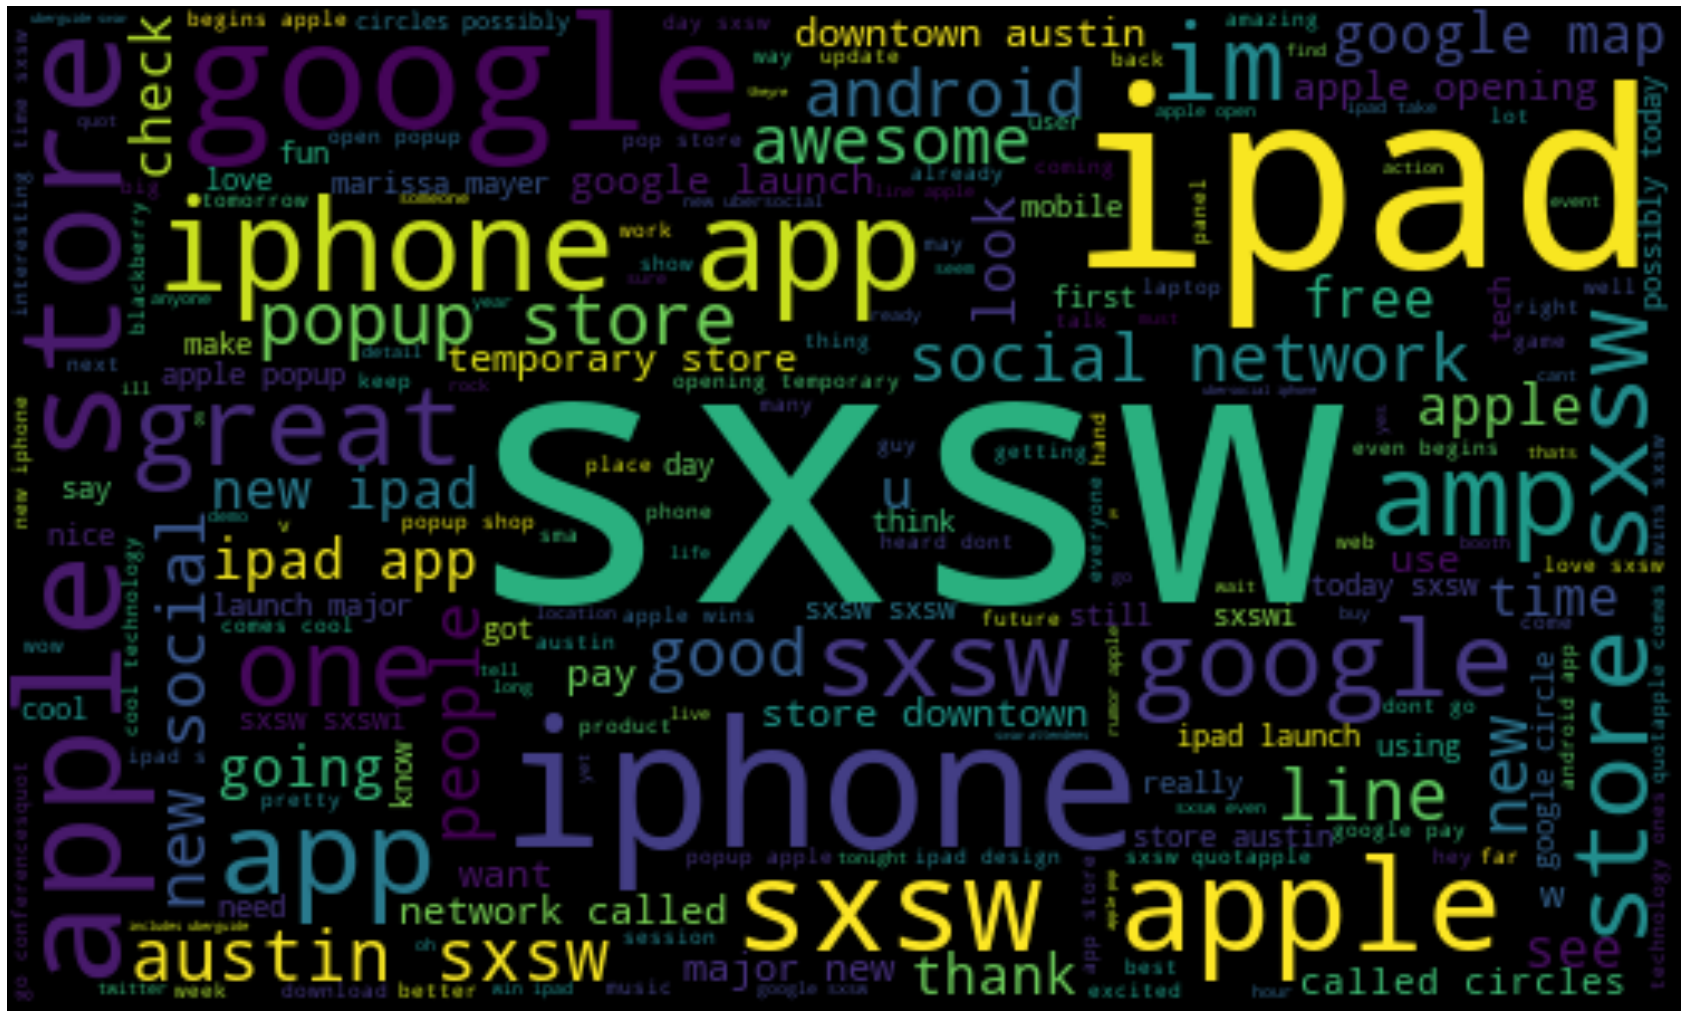

In [858]:
#Creating another All Tweets wordcloud without the unused words
# Word Cloud Visualization
allwords = ' '.join([twts for twts in df['tweet_new']])
wcallwords = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allwords)

fig, ax = plt.subplots(figsize  = (30,30))
plt.imshow(wcallwords, interpolation="bilinear")
plt.axis('off')
plt.show()

In the above WordCloud, it shows that it was useful to remove the unused words to be able to see more clearly the words that have meaning and that are frequently used in the tweets.

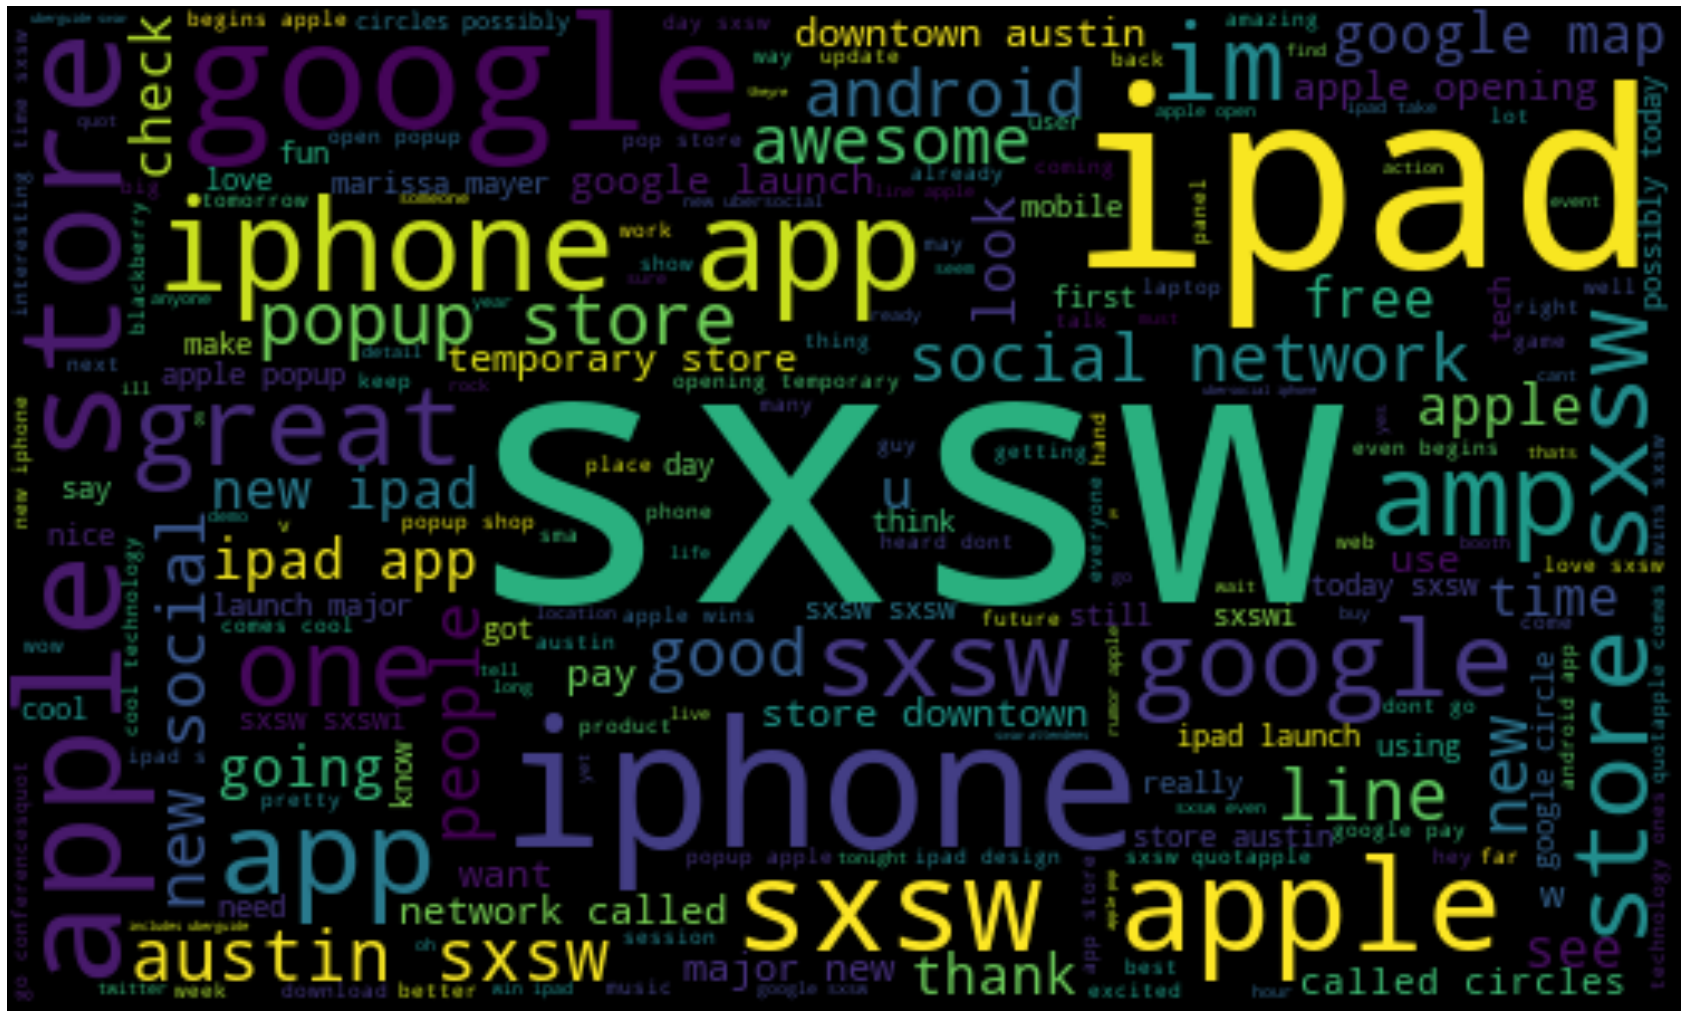

In [859]:
#Plotting most frequent words in the negative tweets
df_neg = df[df['emotion']==0]
negwords = ' '.join([twts for twts in df['tweet_new']])
wcnegwords = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(negwords)

fig, ax = plt.subplots(figsize  = (30,30))
plt.imshow(wcnegwords, interpolation="bilinear")
plt.axis('off')
plt.show()

Ok, this looks a lot better without the non-useful words taking up the real estate in the image.

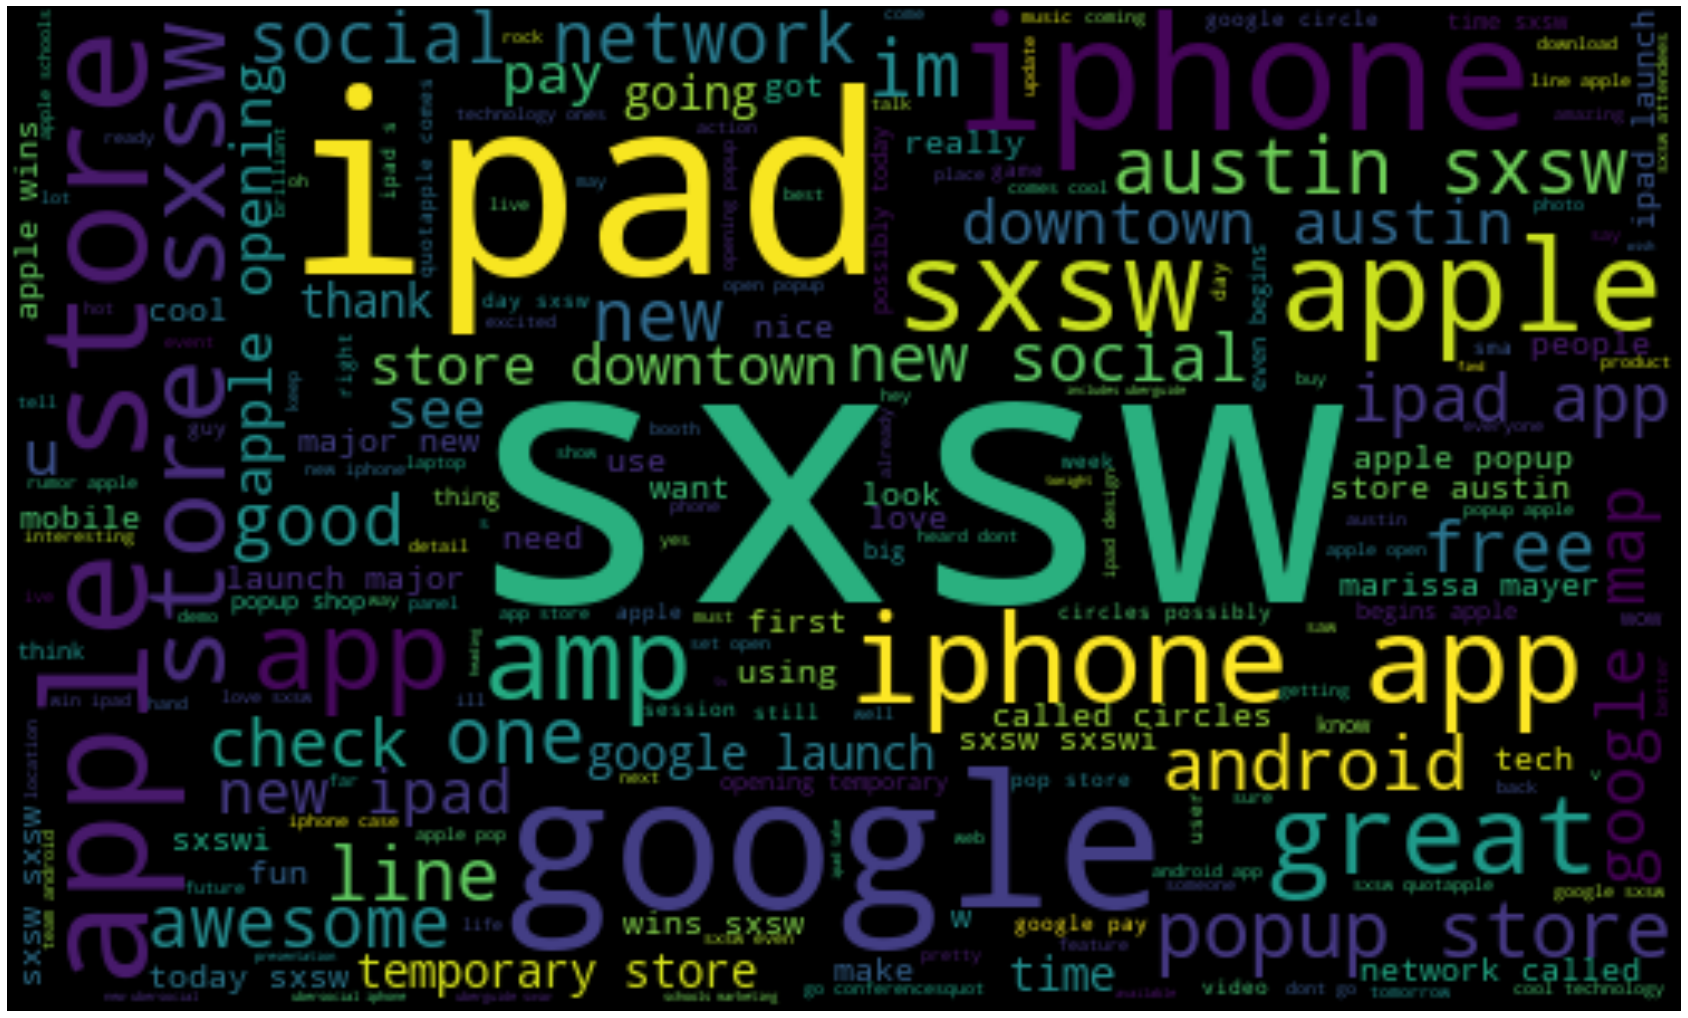

In [860]:
#Plotting most frequent words in the positive tweets
df_pos = df[df['emotion']==1]
poswords = ' '.join([twts for twts in df_pos['tweet_new']])
wcposwords = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(poswords)

fig, ax = plt.subplots(figsize  = (30,30))
plt.imshow(wcposwords, interpolation="bilinear")
plt.axis('off')
plt.show()

From the wordcloud, we can already tell that the main topic is SXSW followed by ipad, google, apple, etc. The word SXSW is understandable because this was the festival that was being tweeted about. The problem we encounter with the WordCloud is that these words are common in both negative and positive tweets. Only in the positive tweets WordCloud can we begin to spot some words like, "great, good, free" that might start to hint at positivity. We will therefore have to continue exploring to learn more about frequency of words.

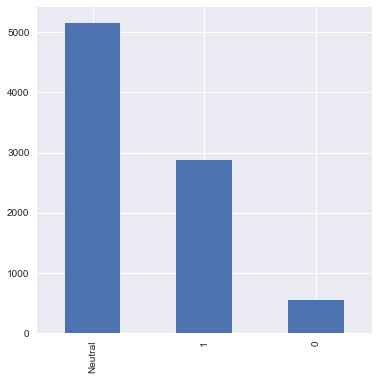

In [861]:
df_copy['emotion'].value_counts().plot.bar(figsize = (6, 6))

With just a basic bar graph we can see there are many more positve tweets than negative. We can also see that many tweets were neutral.

## Word Tokenization

Tokenization is a very important step when working with text data. In order to understand the frequency of each word and to create models, we will need to tokenize. Word tokenization breaks down the tweets into individual words and creates an array of these words. 

In [862]:
#There is a package of tokenizing just for tweets. 
#The difference between this and the normal tokenize package is that it keeps hastages intact.
tk = TweetTokenizer(reduce_len=True)

data = []
#We will put our data into lists to smoothen the work
features = df['tweet_new'].tolist()
labels = df['emotion'].tolist()

In [863]:
# Next we will build our data into tuples
for x, y in zip(features, labels):
    if y == 1:
        data.append((tk.tokenize(x), 1))
    else:
        data.append((tk.tokenize(x), 0))

data[:12]

[(['wesley',
   'g',
   'iphone',
   'hrs',
   'tweeting',
   'riseaustin',
   'dead',
   'need',
   'upgrade',
   'plugin',
   'stations',
   'sxsw'],
  0),
 (['jessedee',
   'know',
   'fludapp',
   'awesome',
   'ipadiphone',
   'app',
   'youll',
   'likely',
   'appreciate',
   'design',
   'also',
   'theyre',
   'giving',
   'free',
   'ts',
   'sxsw'],
  1),
 (['swonderlin', 'wait', 'ipad', 'also', 'sale', 'sxsw'], 1),
 (['sxsw',
   'hope',
   'years',
   'festival',
   'isnt',
   'crashy',
   'years',
   'iphone',
   'app',
   'sxsw'],
  0),
 (['sxtxstate',
   'great',
   'stuff',
   'fri',
   'sxsw',
   'marissa',
   'mayer',
   'google',
   'tim',
   'oreilly',
   'tech',
   'booksconferences',
   'amp',
   'matt',
   'mullenweg',
   'wordpress'],
  1),
 (['sxsw',
   'staing',
   'ctia',
   'around',
   'corner',
   'googleio',
   'hop',
   'skip',
   'jump',
   'good',
   'time',
   'android',
   'fan'],
  1),
 (['beautifully',
   'sma',
   'simple',
   'idea',
   'madebyma

## Frequency of Words

In [911]:
from nltk.tokenize import word_tokenize

word_tokens = []
for word in df:
    print(word_tokenize(df))
    word_tokens.append(word_tokenize(df))

TypeError: expected string or bytes-like object

In [909]:
frequency = FreqDist(tokens).most_common(20)
frequency

TypeError: expected string or bytes-like object

In [865]:
# #Normalized Frequency of Words
# total_word_count = sum(most_freq_tweet_words.values())
# top_100_tweeted_words = most_freq_tweet_words.most_common(100)
# print('Word\t\t\tNormalized Frequency')
# for word in top_100_tweeted_words:
#     normalized_freq = word[1] / total_word_count
#     print('{} \t\t\t {:.4}'.format(word[0], normalized_freq))

## Preparing Data

In [866]:
# As the Naive Bayesian classifier accepts inputs in a dict-like structure,
# we have to define a function that transforms our data into the required input structure
final_data = []

# Transforming the data to fit the input structure of the Naive Bayesian classifier
for tokens, label in data:
    final_data.append((list_to_dict(tokens), label))
    
# Previewing our final (tokenized, cleaned) data list
final_data[:5]

[({'wesley': True,
   'g': True,
   'iphone': True,
   'hrs': True,
   'tweeting': True,
   'riseaustin': True,
   'dead': True,
   'need': True,
   'upgrade': True,
   'plugin': True,
   'stations': True,
   'sxsw': True},
  0),
 ({'jessedee': True,
   'know': True,
   'fludapp': True,
   'awesome': True,
   'ipadiphone': True,
   'app': True,
   'youll': True,
   'likely': True,
   'appreciate': True,
   'design': True,
   'also': True,
   'theyre': True,
   'giving': True,
   'free': True,
   'ts': True,
   'sxsw': True},
  1),
 ({'swonderlin': True,
   'wait': True,
   'ipad': True,
   'also': True,
   'sale': True,
   'sxsw': True},
  1),
 ({'sxsw': True,
   'hope': True,
   'years': True,
   'festival': True,
   'isnt': True,
   'crashy': True,
   'iphone': True,
   'app': True},
  0),
 ({'sxtxstate': True,
   'great': True,
   'stuff': True,
   'fri': True,
   'sxsw': True,
   'marissa': True,
   'mayer': True,
   'google': True,
   'tim': True,
   'oreilly': True,
   'tech': Tr

In [867]:
trim_index = int(len(final_data) * 0.9)

train_data = final_data[:trim_index]
test_data = final_data[trim_index:]

In [868]:
# As our data is currently ordered by label, we have to shuffle it before splitting it
# .Random(140) randomizes our data with seed = 140. This guarantees the same shuffling for every execution of our code
# Feel free to alter this value or even omit it to have different outputs for each code execution
random.Random(140).shuffle(final_data)

# Here we decided to split our data as 90% train data and 10% test data
# Once again, feel free to alter this number and test the model accuracy
trim_index = int(len(final_data) * 0.9)

train_data = final_data[:trim_index]
test_data = final_data[trim_index:]

In [869]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

# Output the model accuracy on the train and test data
print('Accuracy on train data:', classify.accuracy(classifier, train_data))
print('Accuracy on test data:', classify.accuracy(classifier, test_data))

#The most informative features will show us what words are heavily in one label and not the other. 
#For example, "headaches" is very often used in a negative tweet and less commonly in a positive tweet.
print(classifier.show_most_informative_features(100))

Accuracy on train data: 0.8701171875
Accuracy on test data: 0.8070175438596491
Most Informative Features
               headaches = True                0 : 1      =     26.8 : 1.0
                   money = True                0 : 1      =     24.6 : 1.0
                  stupid = True                0 : 1      =     19.6 : 1.0
                  caring = True                0 : 1      =     19.6 : 1.0
                    lost = True                0 : 1      =     18.2 : 1.0
                 tmobile = True                0 : 1      =     16.1 : 1.0
                    suck = True                0 : 1      =     16.1 : 1.0
                 fucking = True                0 : 1      =     16.1 : 1.0
                   alarm = True                0 : 1      =     16.1 : 1.0
                     fix = True                0 : 1      =     16.1 : 1.0
             geolocation = True                0 : 1      =     16.1 : 1.0
                    uses = True                0 : 1      =     13.9 :

This is very interesting because we can see which words are associated with negative or positive tweets. It looks like the words "free, downtown, and video" are more commonly associated with positive tweets.

In [870]:
#Let's test the model!
random_tweet = "I had a fun time yesterday at sxsw"

custom_tokens = (tk.tokenize(random_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


Wow, that's cool! According to our accuracy score, it is not 100% accurate. But it works with the tweets I try to input.

## Vectorization - Bag of Words

Let's try other models. Now that we have broken down the phrases into tokenized words, we can also perform count vectorization. What this will do for our data is similar to One-hot encoding. Count vectorization creates vectors equal to the size of vocabulary of our data. Every time the word is featured in the text data, it will receive a 1 in the vector dimension.

In [871]:
#Count vectorization
vectorizer = CountVectorizer(preprocessor=None)
bag_of_words = vectorizer.fit_transform(df.tweet_new)

In [872]:
#Inspecting our text
print('Vocabulary: ')
print(vectorizer.vocabulary_)

Vocabulary: 
{'wesley': 5793, 'iphone': 2692, 'hrs': 2462, 'tweeting': 5512, 'riseaustin': 4432, 'dead': 1247, 'need': 3422, 'upgrade': 5602, 'plugin': 3859, 'stations': 4943, 'sxsw': 5112, 'jessedee': 2755, 'know': 2855, 'fludapp': 1893, 'awesome': 363, 'ipadiphone': 2678, 'app': 227, 'youll': 5990, 'likely': 2980, 'appreciate': 256, 'design': 1311, 'also': 145, 'theyre': 5295, 'giving': 2107, 'free': 1962, 'ts': 5479, 'swonderlin': 5104, 'wait': 5715, 'ipad': 2674, 'sale': 4491, 'hope': 2433, 'years': 5970, 'festival': 1823, 'isnt': 2717, 'crashy': 1132, 'sxtxstate': 5152, 'great': 2190, 'stuff': 5025, 'fri': 1968, 'marissa': 3166, 'mayer': 3195, 'google': 2147, 'tim': 5346, 'oreilly': 3609, 'tech': 5218, 'booksconferences': 568, 'amp': 167, 'matt': 3187, 'mullenweg': 3377, 'wordpress': 5893, 'staing': 4929, 'ctia': 1175, 'around': 279, 'corner': 1083, 'googleio': 2160, 'hop': 2432, 'skip': 4749, 'jump': 2793, 'good': 2140, 'time': 5348, 'android': 180, 'fan': 1763, 'beautifully': 45

In [873]:
# #Passing the text into the vectors
# vector = vectorizer.transform(tokens_all)

In [874]:
#Computing the Term-Document Matrix (TDM)
tdm = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names())
tdm

aapl  abacus  abandoned  aber  able  absolute  absolutely  abt  abuzz  \
0        0       0          0     0     0         0           0    0      0   
1        0       0          0     0     0         0           0    0      0   
2        0       0          0     0     0         0           0    0      0   
3        0       0          0     0     0         0           0    0      0   
4        0       0          0     0     0         0           0    0      0   
...    ...     ...        ...   ...   ...       ...         ...  ...    ...   
3409     0       0          0     0     0         0           0    0      0   
3410     0       0          0     0     0         0           0    0      0   
3411     0       0          0     0     0         0           0    0      0   
3412     0       0          0     0     0         0           0    0      0   
3413     0       0          0     0     0         0           0    0      0   

      academy  ...  zimride  zip  zite  zms  zombies  zomg  zone  zoom  zzzs  \
0           0  ...        0    0     0    0        0     0     0     0     0   
1           0  ...        0    0     0    0        0     0     0     0     0   
2           0  ...        0    0     0    0        0     0     0     0     0   
3           0  ...        0    0     0    0        0     0     0     0     0   
4           0  ...        0    0     0    0        0     0     0     0     0   
...       ...  ...      ...  ...   ...  ...      ...   ...   ...   ...   ...   
3409        0  ...        0    0     0    0        0     0     0     0     0   
3410        0  ...        0    0     0    0        0     0     0     0     0   
3411        0  ...        0    0     0    0        0     0     0     0     0   
3412        0  ...        0    0     0    0        0     0     0     0     0   
3413        0  ...        0    0     0    0        0     0     0     0     0   

      ξс  
0      0  
1      0  
2      0  
3      0  
4      0  
...   ..  
3409   0  
3410   0  
3411   0  
3412   0  
3413   0  

[3414 rows x 6024 columns]

In [875]:
# Create features and labels
y = df['emotion']
X = bag_of_words

In [876]:
# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [877]:
#Checking Shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2731, 6024)
(683, 6024)
(2731,)
(683,)


## Naive Bayes Multinomial Classifier w/ Count Vectorization

The first model we will train is a Naive Bayes Multinomial Classifier. It is a simple classifier that works with discrete values. In a NB Classifier, all features are independent of each other and contribute equally to the ouput. They are 'Naive'.

In [878]:
# Multinomial Naives Bayes Classifier

mnb = MultinomialNB()

mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print("Training Accuracy :", mnb.score(X_train, y_train))
print("Testing Accuracy :", mnb.score(X_test, y_test))

Training Accuracy : 0.9534968875869645
Testing Accuracy : 0.849194729136164


In [879]:
stsc = StandardScaler(with_mean=False) 
x_train_scale = stsc.fit_transform(X_train)
x_test_scale = stsc.fit_transform(X_test)

In [880]:
# Multinomial Naives Bayes Classifier
mnb = MultinomialNB()

mnb.fit(x_train_scale, y_train)
y_pred = mnb.predict(x_test_scale)

print("Training Accuracy :", mnb.score(x_train_scale, y_train))
print("Testing Accuracy :", mnb.score(x_test_scale, y_test))

Training Accuracy : 0.9864518491395093
Testing Accuracy : 0.746705710102489


In [881]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy of model fitted to test set is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy of model fitted to test set is :74.67057101024889

AUC is :0.73

Confusion Matrix
----------------


Predicted    0    1  All
True                    
0           78   34  112
1          139  432  571
All        217  466  683

## TF-IDF Vectorization

Count Vectorization was an interesting exercise but as we can see, we will need a more advanced type of vectorization in order to see how unique the words are in the text. For example, if the word is used frequently in other texts, it is probably not important. Term Frequency, Inverse Document Frequency (TF-IDF Vectorization) is a more advanced method that will help us understand the weights of the terms.<br><br>
TF  = (Frequency of a word in the document)/(Total words in the document)

IDF = Log((Total number of docs)/(Number of docs containing the word))

In [882]:
# vectorizertf = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
# processed_features = vectorizertf.fit_transform(processed_features).toarray()

vectorizer = TfidfVectorizer(min_df= 5)
analyzer = vectorizer.fit_transform(df.tweet_new)

In [883]:
print(len(df.tweet_new))

3414


In [884]:
df_tf = pd.DataFrame(analyzer.toarray(), columns = vectorizer.get_feature_names())
df_tf

aapl  able  aclu  acquired  action  actually   ad  added  adoption  \
0      0.0   0.0   0.0       0.0     0.0       0.0  0.0    0.0       0.0   
1      0.0   0.0   0.0       0.0     0.0       0.0  0.0    0.0       0.0   
2      0.0   0.0   0.0       0.0     0.0       0.0  0.0    0.0       0.0   
3      0.0   0.0   0.0       0.0     0.0       0.0  0.0    0.0       0.0   
4      0.0   0.0   0.0       0.0     0.0       0.0  0.0    0.0       0.0   
...    ...   ...   ...       ...     ...       ...  ...    ...       ...   
3409   0.0   0.0   0.0       0.0     0.0       0.0  0.0    0.0       0.0   
3410   0.0   0.0   0.0       0.0     0.0       0.0  0.0    0.0       0.0   
3411   0.0   0.0   0.0       0.0     0.0       0.0  0.0    0.0       0.0   
3412   0.0   0.0   0.0       0.0     0.0       0.0  0.0    0.0       0.0   
3413   0.0   0.0   0.0       0.0     0.0       0.0  0.0    0.0       0.0   

      agileagency  ...  yet  you  youd     youll  youre   yr  yrs  zappos  \
0             0.0  ...  0.0  0.0   0.0  0.000000    0.0  0.0  0.0     0.0   
1             0.0  ...  0.0  0.0   0.0  0.390724    0.0  0.0  0.0     0.0   
2             0.0  ...  0.0  0.0   0.0  0.000000    0.0  0.0  0.0     0.0   
3             0.0  ...  0.0  0.0   0.0  0.000000    0.0  0.0  0.0     0.0   
4             0.0  ...  0.0  0.0   0.0  0.000000    0.0  0.0  0.0     0.0   
...           ...  ...  ...  ...   ...       ...    ...  ...  ...     ...   
3409          0.0  ...  0.0  0.0   0.0  0.000000    0.0  0.0  0.0     0.0   
3410          0.0  ...  0.0  0.0   0.0  0.000000    0.0  0.0  0.0     0.0   
3411          0.0  ...  0.0  0.0   0.0  0.000000    0.0  0.0  0.0     0.0   
3412          0.0  ...  0.0  0.0   0.0  0.000000    0.0  0.0  0.0     0.0   
3413          0.0  ...  0.0  0.0   0.0  0.000000    0.0  0.0  0.0     0.0   

      zazzlesxsw  zomg  
0            0.0   0.0  
1            0.0   0.0  
2            0.0   0.0  
3            0.0   0.0  
4            0.0   0.0  
...          ...   ...  
3409         0.0   0.0  
3410         0.0   0.0  
3411         0.0   0.0  
3412         0.0   0.0  
3413         0.0   0.0  

[3414 rows x 1097 columns]

In [885]:
#Splitting train test data with TF-IDF Vectorized data
# Create features and labels
y = df['emotion']
X = df_tf

In [886]:
# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

## Naive Bayes Multinomial Classifier with TF-IDF Vectorization

In [887]:
# Multinomial Naives Bayes Classifier
mnb = MultinomialNB()

mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print("Training Accuracy :", mnb.score(X_train, y_train))
print("Testing Accuracy :", mnb.score(X_test, y_test))

Training Accuracy : 0.8747711461003296
Testing Accuracy : 0.8550512445095169


In [888]:
stsc = StandardScaler(with_mean=False) 
x_train_scale = stsc.fit_transform(X_train)
x_test_scale = stsc.fit_transform(X_test)

In [889]:
# Multinomial Naives Bayes Classifier
mnb = MultinomialNB()

mnb.fit(x_train_scale, y_train)
y_pred = mnb.predict(x_test_scale)

print("Training Accuracy :", mnb.score(x_train_scale, y_train))
print("Testing Accuracy :", mnb.score(x_test_scale, y_test))

Training Accuracy : 0.8879531307213475
Testing Accuracy : 0.7862371888726208


In [890]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy of model fitted to test set is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy of model fitted to test set is :78.62371888726209

AUC is :0.7

Confusion Matrix
----------------


Predicted    0    1  All
True                    
0           63   49  112
1           97  474  571
All        160  523  683

## Decision Tree Classifier

In [891]:
classifier = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=10)  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=10)

In [892]:
# Make predictions for test data
y_pred_1 = classifier.predict(X_test)

In [893]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred_1) * 100
print('Accuracy of model fitted to test set is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy of model fitted to test set is :33.67496339677892

AUC is :0.7

Confusion Matrix
----------------


Predicted    0    1  All
True                    
0           63   49  112
1           97  474  571
All        160  523  683

In [894]:
# Plot and show decision tree
plt.figure(figsize=(20,20), dpi=500)
tree.plot_tree(classifier, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

In [895]:
featuresimportant = classifier.feature_importances_
# featuresimportant

In [896]:
dffeatures = pd.DataFrame(featuresimportant)

In [897]:
print(dffeatures)

        0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
1092  0.0
1093  0.0
1094  0.0
1095  0.0
1096  0.0

[1097 rows x 1 columns]


In [898]:
# def plot_feature_importances(model):
#     n_features = X_train.shape[1]
#     plt.figure(figsize=(8,8))
#     plt.barh(range(n_features), model.feature_importances_, align='center') 
#     plt.yticks(np.arange(n_features), X_train.columns.values) 
#     plt.xlabel('Feature importance')
#     plt.ylabel('Feature')

# plot_feature_importances(classifier)

## Random Forest Classifier

In [899]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=10, n_estimators=20)
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=20,
                       random_state=10)

In [900]:
# Make predictions for test data
y_pred_2 = forest.predict(X_test)

In [901]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred_2) * 100
print('Accuracy of model fitted to test set is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy of model fitted to test set is :69.8389458272328

AUC is :0.7

Confusion Matrix
----------------


Predicted    0    1  All
True                    
0           63   49  112
1           97  474  571
All        160  523  683

In [902]:
# plot_feature_importances(forest)

## Conclusions

There is a lot of value in the analysis of tweet sentiment in marketing and other professions. Learning how consumers feel about an event or product gives valuable insight into the product. Moving forward, these tweet sentiments could even be evaluated in a real time, streaming analysis and therefore learning how actual events are affecting the moods and emotions of consumers.